In [2]:
import numpy as np
import matplotlib.pyplot as plt
import qutip
from IPython.display import clear_output

# Examples of single qubit gates

Bloch-sphere plots of qubit states before and after applying a single qubit gate 

To plot arbitrary states on the Bloch sphere, let's define some basic gate matrices,

$Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$ $X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$ $Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$

as well as their plus/minus half rotations, and a function that returns the expectation value for the state of each one (e.g. $\langle \psi_t | \sigma_z | \psi_t \rangle$)

In [3]:
Iden = np.array([[1,0],
                 [0,1]])
Z = np.array([[1,0],
              [0,-1]])
X = np.array([[0,1],
              [1,0]])
Y = np.array([[0,-1j],
              [1j,0]])
Z2 = np.array([[1-1j,0],
               [0,1+1j]])/ np.sqrt(2)
X2 = np.array([[1,-1j],
               [-1j,1]])/ np.sqrt(2)
Y2 = np.array([[1,-1],
               [1,1]])/ np.sqrt(2)
mZ2 = Z2.conj().T
mX2 = X2.conj().T
mY2 = Y2.conj().T

def bsPoints(qState):
    x = (qState.conj().T @ X @ qState).real[0,0]
    y = (qState.conj().T @ Y @ qState).real[0,0]
    z = (qState.conj().T @ Z @ qState).real[0,0]
    return [x,y,z]

Define an initial state $| \psi(t=0) \rangle = c_0 | E_0 \rangle + c_1 | E_1 \rangle = \begin{pmatrix} c_0 \\ c_1 \end{pmatrix}$ and plot on the Bloch sphere

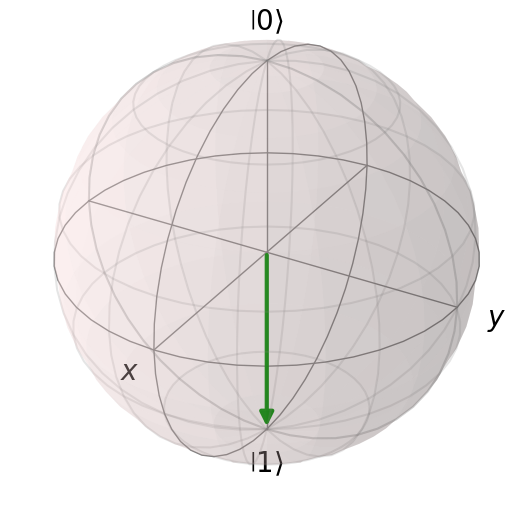

In [4]:
psi0 = np.array([[0],[1]])
# psi0 = np.array([[1],[1j]])*1/np.sqrt(2)
# psi0 = np.array([1,-1])*1/np.sqrt(2)
# psi0 = np.array([1,np.exp(1j*np.pi/4)])*1/np.sqrt(2)

bsPlot = qutip.Bloch()
bsPlot.add_vectors(bsPoints(psi0))
bsPlot.show()

Apply a gate to the initial state and plot both states:

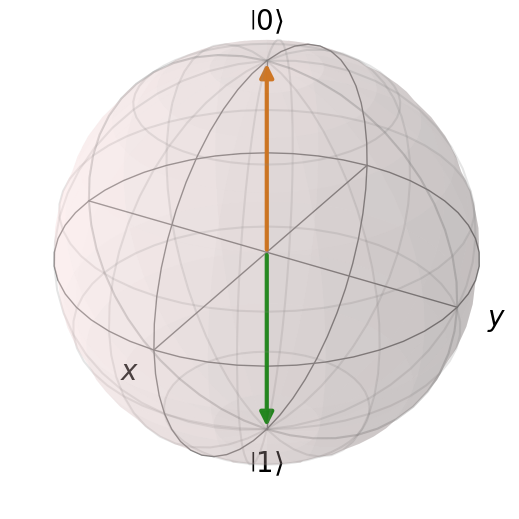

In [5]:
psiF = X @ psi0
bsPlot = qutip.Bloch()
bsPlot.add_vectors([bsPoints(psi0),bsPoints(psiF)])
bsPlot.show()

## Hahn echo with arbitrary initial and final projections

Let's try a more complicated pulse sequence, a Hahn echo used to extract T2. The sequence is $\sqrt{X} - Y - \sqrt{X}$ and we can add a gate at the start or end to project the qubit into a different axis, for tomography purposes

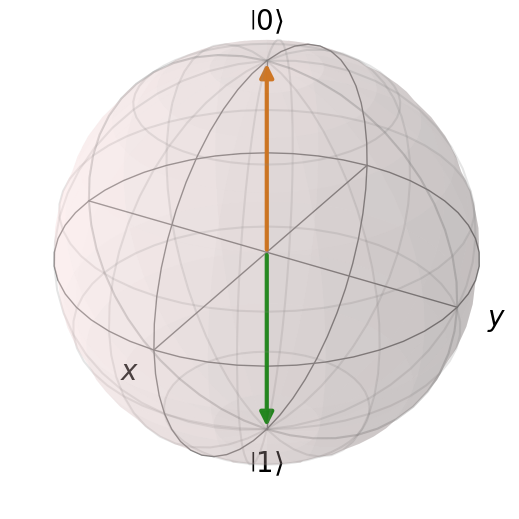

In [6]:
# Define the gates to be applied for initial and final projections
initProj = Iden
finalProj = Iden

psi0 = np.array([[0],[1]]) # Starting from -Z
psiInit = initProj @ psi0 # Project to initial state
gateSequence = X2 @ Y @ X2 # T2-Hahn sequence
psiF = finalProj @ gateSequence @ psiInit # Project to final state

bsPlot = qutip.Bloch()
bsPlot.add_vectors([bsPoints(psiInit),bsPoints(psiF)])
bsPlot.show()